In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/workspaces/Advanced-Data-Analyst-Projects/supply_chain_disruption_prediction/data/shipments_cleaned.csv")

Text(0.5, 1.0, 'Distribution of Disruptions')

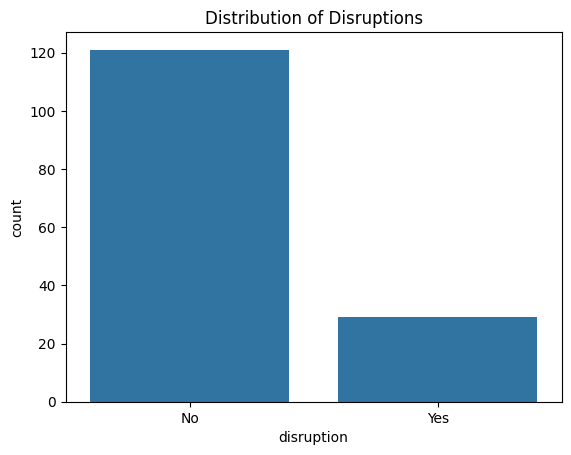

In [3]:
sns.countplot(data=df, x='disruption')
plt.title('Distribution of Disruptions')

<Axes: title={'center': 'Disruption Rate by Supplier'}, xlabel='supplier'>

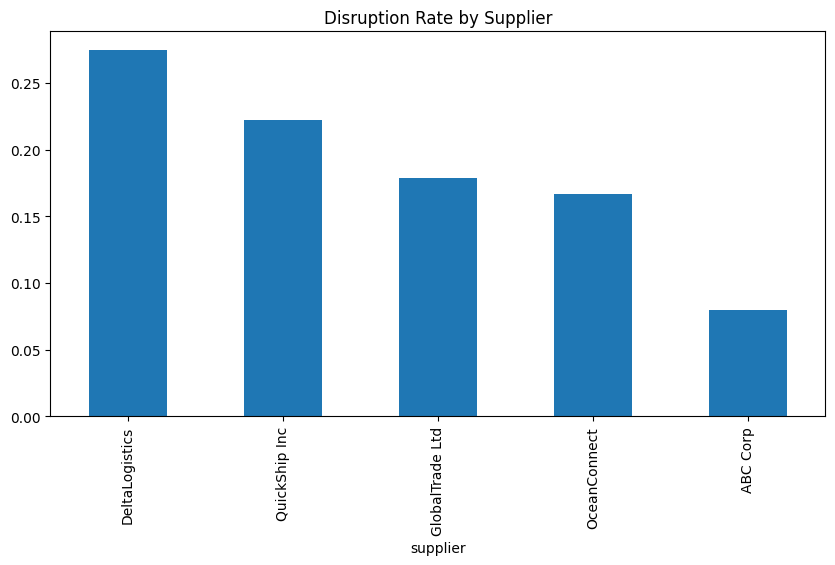

In [5]:
# Map 'Yes' to 1 and 'No' to 0 for disruption
df['disruption_numeric'] = df['disruption'].map({'Yes': 1, 'No': 0})
supplier_delay = df.groupby('supplier')['disruption_numeric'].mean().sort_values(ascending=False)
supplier_delay.plot(kind='bar', figsize=(10,5), title='Disruption Rate by Supplier')

<Axes: >

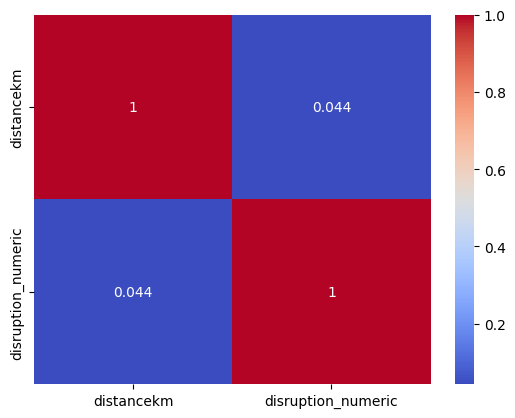

In [7]:
numeric_cols = ['distancekm', 'disruption_numeric']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')

In [9]:
top_routes = df.groupby(['origin', 'destination'])['disruption_numeric'].mean().sort_values(ascending=False).head(10)
print(top_routes)

origin     destination
Delhi      New York       0.600000
Bangalore  New York       0.500000
Mumbai     London         0.375000
Chennai    New York       0.333333
Delhi      Singapore      0.333333
Kolkata    Berlin         0.333333
Mumbai     Dubai          0.333333
           Singapore      0.300000
Kolkata    Dubai          0.285714
Bangalore  London         0.250000
Name: disruption_numeric, dtype: float64


In [11]:
df.groupby('supplier')['disruption_numeric'].mean().reset_index().to_csv('/workspaces/Advanced-Data-Analyst-Projects/supply_chain_disruption_prediction/report/supplier_disruption_rate.csv', index=False)